![title](header.png)

K Means clustering is an <i>unsupervised</i> learning algorithm, which takes <i>unlabelled</i> data and categorises it into groups, or clusters. The obvious application is finding clusters of points in space (for example, electron clouds), however it has much wider applications due to the abstract nature of the algorithm. For example, K means clustering is used in market analysis to find groups of similar customers based on spending metrics like money spent on a shopping website. By the end of this guide you should be confident with the K Means clustering algorithm and how to apply it to real data, as well as understanding the limitations of the algorithm and how to deal with them.

## The K Means Clustering Algorithm

The K Means clustering algorithm starts with our data, and a choice of the number of centers we'd expect - we call this K (more on this later). The algorithm then chooses K centers randomly, and then associates each data point with the center closest to it. The algorithm then recomputes the center by using the mean position of all the points in each cluster, and performs the association step again. This process continues until points stop changing between clusters:


<i> Means randomly chosen: </i>
![Image of K Means 1](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5e/K_Means_Example_Step_1.svg/197px-K_Means_Example_Step_1.svg.png)

<i> Association Step: </i>
![Image of K Means 2](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a5/K_Means_Example_Step_2.svg/197px-K_Means_Example_Step_2.svg.png)

<i> Centroid Step: </i>
![Image of K Means 3](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3e/K_Means_Example_Step_3.svg/197px-K_Means_Example_Step_3.svg.png) 

<i> Two steps above repeated until no more changes occur: </i>
![Image of K Means 4](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d2/K_Means_Example_Step_4.svg/197px-K_Means_Example_Step_4.svg.png) 


## How do we choose K?

The main problem with the K Means clustering algorithm is we don't always know how many clusters our data will have. Ususally there are context clues to determine K (in the example of electron clouds, we can use the theory), however sometimes we are left with no help whatsoever. In this case, we can use the <i>elbow method</i>, which involves trying out all values of K and seeing at which value the change in error stops being so large. This might seem a bit abstract, but it will make sense in the example below:

## A Simple Example

We're going to start by looking at 2 dimensional data that has been generated by using a cluster generator from scikitlearn. First we need to import the modules we'll need: 

In [20]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd

Then we're going to set up our random data using the <i>make_blobs</i> function. The make_blobs function has a lot of optional arguements, so we need to specify our arguement names so Python doesn't get confused. The make_blobs function also gives us supplementary information in a list along with the data we want, so we have to index our data out.

In [12]:
data = make_blobs(n_samples=400, centers=4)[0]

print(data[:5])

[[  9.69725985  -5.60012115]
 [ -2.78447384  10.48485873]
 [  3.50312548  10.57328187]
 [  5.04676497   7.65250161]
 [ -3.77011938  10.57921521]]


Now we have our data, we can start analysis. We already know we have 4 centers, but since our data is 2 dimensional we can graph it just to make sure. Since our data comes in the form of a 2d numpy array, we have to do an indexing trick to get the list of x coordinates and y coordinates seperately.

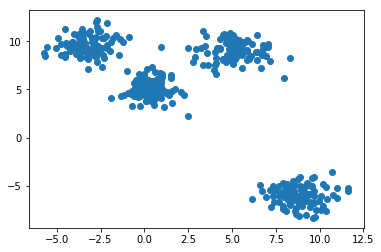

In [13]:
x = data[:,0]
y = data[:,1]

plt.scatter(x,y)
plt.show()

If you've run this code and you don't see 4 clusters, you'll need to run the make_blobs cell again to generate new data to make sure you don't get any overlapping clusters. Now we can look at how to implement the algorithm. This is as simple as runnning the below code:

In [14]:
model = KMeans(n_clusters=4).fit(data)

The <i>model</i> variable now contains a bunch of information about our data. Let's look at how to graph our data again and show which cluster each point corresponds to, as well as the cluster centers.

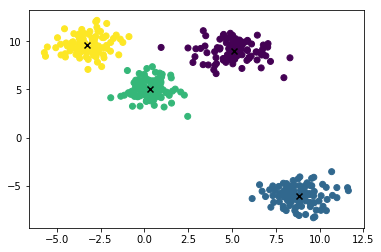

In [15]:
centers = model.cluster_centers_ #Gives us an array of centers

labels = model.labels_ #Gives us an array with a number corresponding to what cluster each point is a member of

plt.scatter(x,y,c=labels)
plt.scatter(centers[:,0],centers[:,1], marker="x", c="Black")

plt.show()

Using this data, we can test which cluster a new data point would fall into. To do this, we need to tell which cluster is which by printing the cluster centers:

In [16]:
print(model.cluster_centers_)

print(model.predict([[0,1],[-3,-4],[10,-5]]))

[[ 5.1014926   8.97651514]
 [ 8.84183299 -6.03036255]
 [ 0.3342559   5.04423698]
 [-3.27150719  9.63395616]]
[2 2 1]


Remember indexing starts at 0! From this we can tell which center is which and find what our predictions mean.

Here we knew that K = 4, but in case we didn't, we can use the elbow method on our data by using the following code:

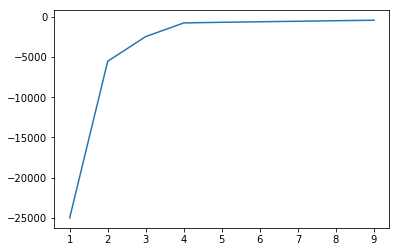

In [19]:
Ks = range(1, 10)
km = [KMeans(n_clusters=i) for i in Ks] #Gives us 9 k means models with k=1,2,3...,9
score = [km[i].fit(data).score(data) for i in range(len(km))] #Fits these models to our data and finds the score (mean error) for each model

plt.plot(Ks,score)
plt.show()

We can see here that there are "elbows" in this graph, with one being at 4. For my data, there's a bigger elbow at K=2. Looking at the graph of our data and thinking about the algorithm it should be obvious why this is the case! In general, you want to take the K Value where the score stops improving.

## Mini Project 1

We're going to add a slight layer of complexity to this problem, but I assure you that the solution is very similar. We're going to look at customer data from a shopping website that details the age, number of items viewed, spending, and time spent on the website, all normalised and adjusted so their means are around 0. Your job is to categorise the customers into clusters, predict what cluster new customers will fall into, and check to see if you have the right number of clusters for your model.

In [34]:
data = pd.read_csv("CUSTOMER_DATA.csv")
print(data.head())
data = data.as_matrix() #Converts this into a numpy array to make it easier to use.

testPoints = [[-2.4,5.88,3.12,-5.2], [2.11,8.42,6.82,8.21]]

   Adj. Age  Adj. No. Items Viewed  Adj. Spending  Adj. Time Spent
0 -8.117912              -5.985314       8.850552         0.824004
1  6.688281              -2.283440      -4.188404        -1.582015
2 -1.006275              -2.587986       2.660652         3.444617
3 -2.962520              -3.353450       3.780374         2.845310
4  2.081291              -8.343180       5.468353        -6.336195


## Mini Project 2

It would be criminal for us not to look at one of the coolest examples of K Means clustering - image quantisation. This involves taking an image and reducing it down to a number of colours while trying to preserve quality. This is done by taking the RGB values of each pixel and performing a K-Means clustering algorithm of these values (similar to clustering in 3d space). We then recreate the image using the centers as colors, and each pixel the color of it's nearest center.

<i>Image without Quantisaiton:</i>
![Image of Without Quantisation](https://upload.wikimedia.org/wikipedia/commons/e/e3/Dithering_example_undithered.png)


<i>Image with Quantisaiton:</i>
![Image of With Quantisation](https://upload.wikimedia.org/wikipedia/en/4/48/Dithering_example_undithered_16color_palette.png)

Your challenge is to make a program that takes an image and outputs the same image, reduced to 16 colours. Here's how I recommend you do it in steps:

* Load an image into Python
* Convert it to a numpy array of RGB values
* Create a K-Means clustering model for the 3 dimensional (RGB) data
* Fit the data to the model
* Replace each point with it's nearest cluster center
* Recreate the image using matplotlib